In [1]:
import pandas as pd 

features = pd.read_csv("data/temps.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [2]:
features.shape

(348, 9)

In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [4]:
import datetime

years = features["year"]
months = features["month"]
days = features["day"]

dates = [str(int(year)) + "-" + str(int(month)) + "-" + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,"%Y-%m-%d") for date in dates]

In [5]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

d:\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Friend Estimate')

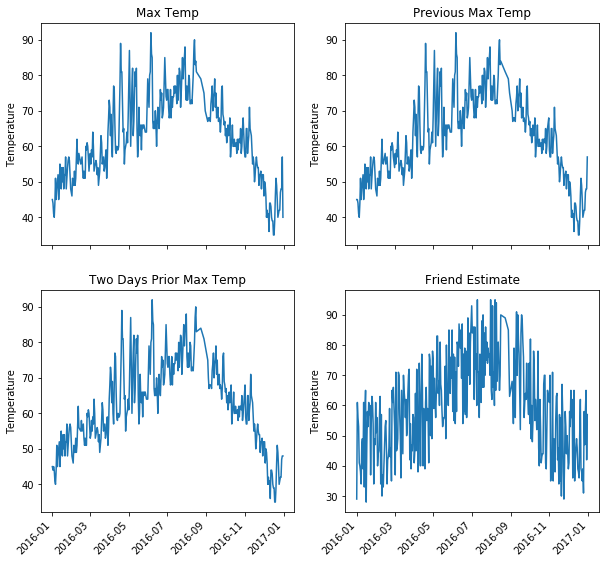

In [6]:
# 
import matplotlib.pyplot as plt
%matplotlib inline

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

ax1.plot(dates,features["actual"])
ax1.set_xlabel(""); ax1.set_ylabel("Temperature");ax1.set_title("Max Temp")

ax2.plot(dates,features["temp_1"])
ax2.set_xlabel(""); ax2.set_ylabel("Temperature");ax2.set_title("Previous Max Temp")

ax3.plot(dates,features["temp_2"])
ax3.set_xlabel(""); ax3.set_ylabel("Temperature");ax3.set_title("Two Days Prior Max Temp")

ax4.plot(dates,features["friend"])
ax4.set_xlabel(""); ax4.set_ylabel("Temperature");ax4.set_title("Friend Estimate")

In [7]:
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [8]:
features.shape

(348, 15)

In [9]:
import numpy as np

labels = np.array(features["actual"])
features = features.drop("actual",axis=1)
features_list = list(features.columns)
features = np.array(features)


In [10]:
# 数据集切分

from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.25,random_state = 42)

In [11]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(261, 14)
(87, 14)
(261,)
(87,)


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [13]:
predictions = rf.predict(test_features)
# print(predictions)
errors = abs(predictions-test_labels)

mape = 100*(errors/test_labels)

print(np.mean(mape))

6.011244187972058


In [14]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5]

export_graphviz(tree,out_file="tree.dot",feature_names=features_list,rounded=True,precision=1)

(graph, ) = pydot.graph_from_dot_file("tree.dot")

graph.write_png("tree.png")

In [15]:
print(tree.tree_.max_depth)

15


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)
rf.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [17]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5]

export_graphviz(tree,out_file="tree2.dot",feature_names=features_list,rounded=True,precision=1)

(graph, ) = pydot.graph_from_dot_file("tree2.dot")

graph.write_png("tree2.png")

In [18]:
# 特征多样性
importances = list(rf.feature_importances_)
rf.feature_importances_
feature_importances = [(feature,round(importance,3)) for feature,importance in zip(features_list,importances)]
feature_importances = sorted(feature_importances,key=lambda x : x[1],reverse = True)
[print("Variable:{:20} Importance : {}".format(*pair)) for pair in feature_importances]

Variable:temp_1               Importance : 0.895
Variable:average              Importance : 0.087
Variable:temp_2               Importance : 0.006
Variable:day                  Importance : 0.004
Variable:week_Mon             Importance : 0.003
Variable:month                Importance : 0.002
Variable:friend               Importance : 0.002
Variable:week_Fri             Importance : 0.001
Variable:year                 Importance : 0.0
Variable:week_Sat             Importance : 0.0
Variable:week_Sun             Importance : 0.0
Variable:week_Thurs           Importance : 0.0
Variable:week_Tues            Importance : 0.0
Variable:week_Wed             Importance : 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
features = pd.read_csv("data/temps_extended.csv")
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [20]:
features.shape

(2191, 12)

In [21]:
import datetime

years = features["year"]
months = features["month"]
days = features["day"]

dates = [str(int(year)) + "-" + str(int(month)) + "-" + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,"%Y-%m-%d") for date in dates]

In [22]:
# 创建一个季节变量
seasons = []

for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')

# 有了季节我们就可以分析更多东西了
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = seasons

d:\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


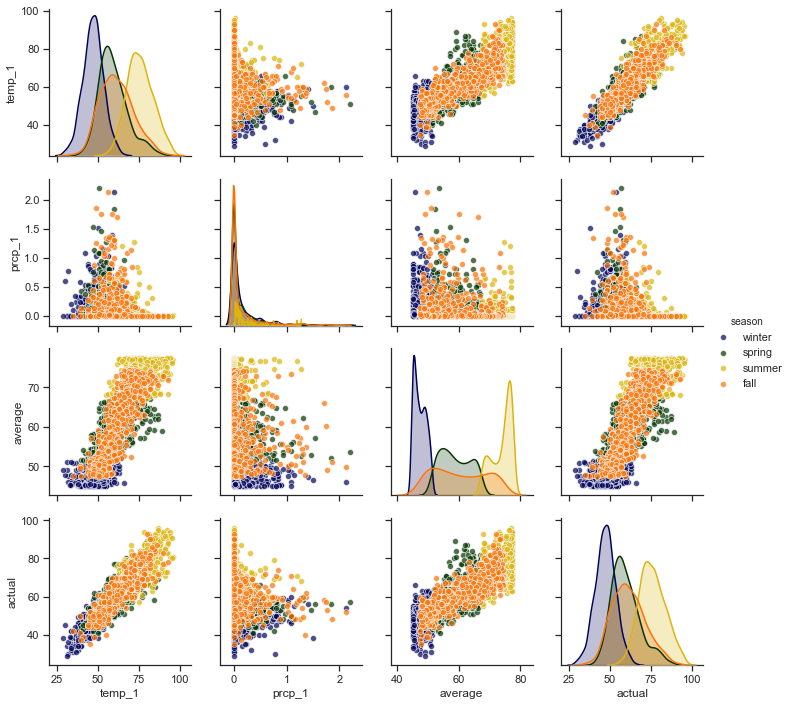

In [28]:
# 导入seaborn工具包
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# 选择你喜欢的颜色模板
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# 绘制pairplot
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

In [26]:
# 独热编码
features = pd.get_dummies(features)

# 提取特征和标签
labels = features['actual']
features = features.drop('actual', axis = 1)

# 特征名字留着备用
feature_list = list(features.columns)

# 转换成所需格式
import numpy as np

features = np.array(features)
labels = np.array(labels)

# 数据集切分
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 0)

Exception: Data must be 1-dimensional

In [27]:
print('训练集特征:', train_features.shape)
print('训练集标签:', train_labels.shape)
print('测试集特征:', test_features.shape)
print('测试集标签:', test_labels.shape)

训练集特征: (1643, 17)
训练集标签: (1643,)
测试集特征: (548, 17)
测试集标签: (548,)
